# Shapiro Gaussian Test and Student's t-Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import os

%matplotlib inline 

In [2]:
seed_value= 3427 

os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)

In [3]:
df = pd.DataFrame(np.random.randint(0,100,size=(30, 6)), columns=list('ABCDEF'))
df

,A,B,C,D,E,F
0,68,60,2,33,58,71
1,91,11,31,7,48,10
2,31,14,93,55,63,92
3,57,38,7,79,44,25
4,35,44,97,43,48,33
5,87,71,87,15,40,36
6,97,64,42,89,4,91
7,78,88,70,52,86,28
8,77,23,41,7,14,27
9,75,82,25,20,97,82


In [4]:
df.mean()

A    55.800000
B    51.666667
C    48.933333
D    43.000000
E    60.700000
F    53.300000
dtype: float64

In [5]:
df.describe()

,A,B,C,D,E,F
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,55.800000,51.666667,48.933333,43.000000,60.700000,53.300000
std,30.034922,25.635823,27.825730,30.674037,26.751925,26.110046
min,2.000000,11.000000,0.000000,0.000000,0.000000,10.000000
25%,35.500000,32.750000,31.750000,13.250000,48.000000,29.250000
50%,62.000000,52.000000,46.500000,42.500000,64.500000,50.500000
75%,81.250000,70.250000,70.750000,66.250000,83.750000,75.000000
max,97.000000,96.000000,97.000000,94.000000,98.000000,98.000000


<AxesSubplot:>

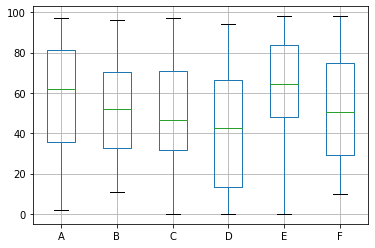

In [6]:
df.boxplot(grid = True) 

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>],
       [<AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'F'}>]], dtype=object)

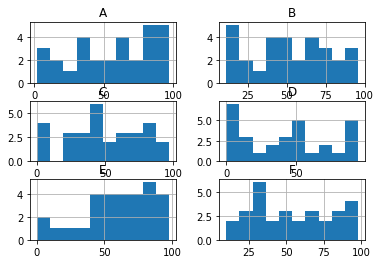

In [7]:
df.hist()

In [8]:
def generate_normal_dataframe(n):
    normal_df = pd.DataFrame(dict(
        A=np.random.normal(38,140,size=n),
        B=np.random.normal(29,110,size=n),
        C=np.random.normal(60,70,size=n),
        D=np.random.normal(90,110,size=n),
        E=np.random.normal(30,59,size=n),
        F=np.random.normal(100,90,size=n)
    ))
    return normal_df

In [9]:
normal_df = generate_normal_dataframe(30)
normal_df

,A,B,C,D,E,F
0,57.175379,-118.979121,93.941010,-15.671473,71.255595,32.993901
1,313.545251,13.469030,-5.549708,110.731627,110.791172,-44.585716
2,-158.703758,4.396391,122.762463,7.029828,189.825479,299.898427
3,132.736592,-50.655910,93.926575,159.577642,24.251065,70.629451
4,194.451094,-29.625515,-76.494164,78.008858,65.658755,16.446922
5,-15.002674,180.449120,163.718066,-44.582008,-25.536375,-55.372506
6,270.116932,30.279975,-12.537302,205.353576,2.427040,134.899278
7,-112.860150,81.694128,6.176163,64.282285,-87.309494,64.634325
8,185.509288,98.385968,155.234516,41.582607,-7.920677,181.908264
9,122.403327,-74.210969,-30.009162,105.131088,25.560434,206.476948


In [10]:
normal_df.mean()

A    38.505520
B    30.415257
C    57.840412
D    63.572779
E    31.251312
F    95.731918
dtype: float64

In [11]:
normal_df.describe()

,A,B,C,D,E,F
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,38.505520,30.415257,57.840412,63.572779,31.251312,95.731918
std,134.285703,104.688596,65.577454,96.069239,65.863984,86.804447
min,-188.433878,-188.586598,-76.494164,-105.081524,-87.309494,-55.372506
25%,-47.127723,-49.298702,8.479640,-10.280903,-16.639847,39.070586
50%,20.439333,21.874503,57.463719,77.366781,22.797896,102.754172
75%,141.974814,92.937601,102.288525,109.993728,83.383438,145.326211
max,313.545251,241.565673,163.718066,312.297553,189.825479,299.898427


<AxesSubplot:>

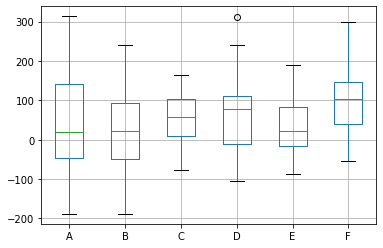

In [12]:
normal_df.boxplot(grid = True) 

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>],
       [<AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'F'}>]], dtype=object)

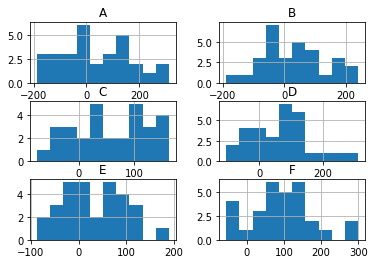

In [13]:
normal_df.hist()

In [14]:
def shapiro_gaussian_test(data):
    stat, p = stats.shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [15]:
data = df['A'].to_numpy()
shapiro_gaussian_test(data)

Statistics=0.921, p=0.029
Sample does not look Gaussian (reject H0)


In [16]:
data = normal_df['A'].to_numpy()
shapiro_gaussian_test(data)

Statistics=0.976, p=0.711
Sample looks Gaussian (fail to reject H0)


In [17]:
# Null Hypothesis (H0): µa = µb (the means of both populations are equal)
# Alternate Hypothesis (Ha): µa ≠ µb (the means of both populations are not equal)

def student_t_test(pop_a, pop_b):
    t_stat, p_value = stats.ttest_ind(pop_a, pop_b, equal_var = False)
    
    print("P-Value={0} T-Statistic={1}".format(p_value,t_stat))

    if p_value <= 0.05:
        print('The mean of the samples is different (reject H0)')
    else:
        print('The mean of the samples is equal (fail to reject H0)')
        

In [18]:
def plot_two_normals(mean_a, std_a, mean_b, std_b):
    n = 50
    a = np.array([random.gauss(mean_a, std_a) for x in range(n)])
    b = np.array([random.gauss(mean_b, std_b) for x in range(n)])

    df_a = pd.DataFrame(a)
    df_b = pd.DataFrame(b)

    ax = df_a.plot(kind="kde")
    df_b.plot(kind="kde", ax=ax)

    plt.show()

    return a, b

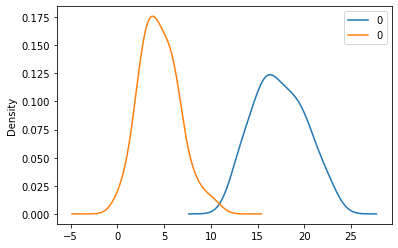

P-Value=7.786198166985136e-45 T-Statistic=26.46613450568423
The mean of the samples is different (reject H0)


In [19]:
mean_a = 17.0 
std_a = 2.5

mean_b = 5.0 
std_b = 2.0

a, b = plot_two_normals(mean_a, std_a, mean_b, std_b)

student_t_test(a, b)

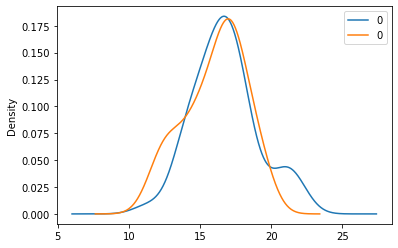

P-Value=0.10696634893814744 T-Statistic=1.6269729359031135
The mean of the samples is equal (fail to reject H0)


In [20]:
mean_a = 17.0 
std_a = 2.1

mean_b = 16.7
std_b = 2.0

a, b = plot_two_normals(mean_a, std_a, mean_b, std_b)
student_t_test(a, b)